In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import features
import plots

c:\Users\matt989253\anaconda3\envs\temp2pip\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
def add_times(df) -> pd.DataFrame:
    """
    Add times to the dataframe.
    Args:
        df: numpy array of shape (N, D).
    Returns:
        data: numpy array of shape (N, D+2).
    """
    df1 = df.copy()
    df1["time"] = df1.index
    df1["day"] = df1["time"] // 21600
    return df1

In [3]:
data_folder = 'data/csv/'
files = '10101.smo.csv'

In [4]:
df = features.load_features(data_folder + files)
df = add_times(df)

def to_hours(tick):
    return tick / 900.0

df['hours'] = df.index.map(to_hours)

In [5]:
df1 = df.copy()
# drop bin0 to bin400
bins = [f"bin{i}" for i in range(401)]

features = ["EEGv", "EMGv"] + bins
df1[features].describe().min().min()

3.31884e-18

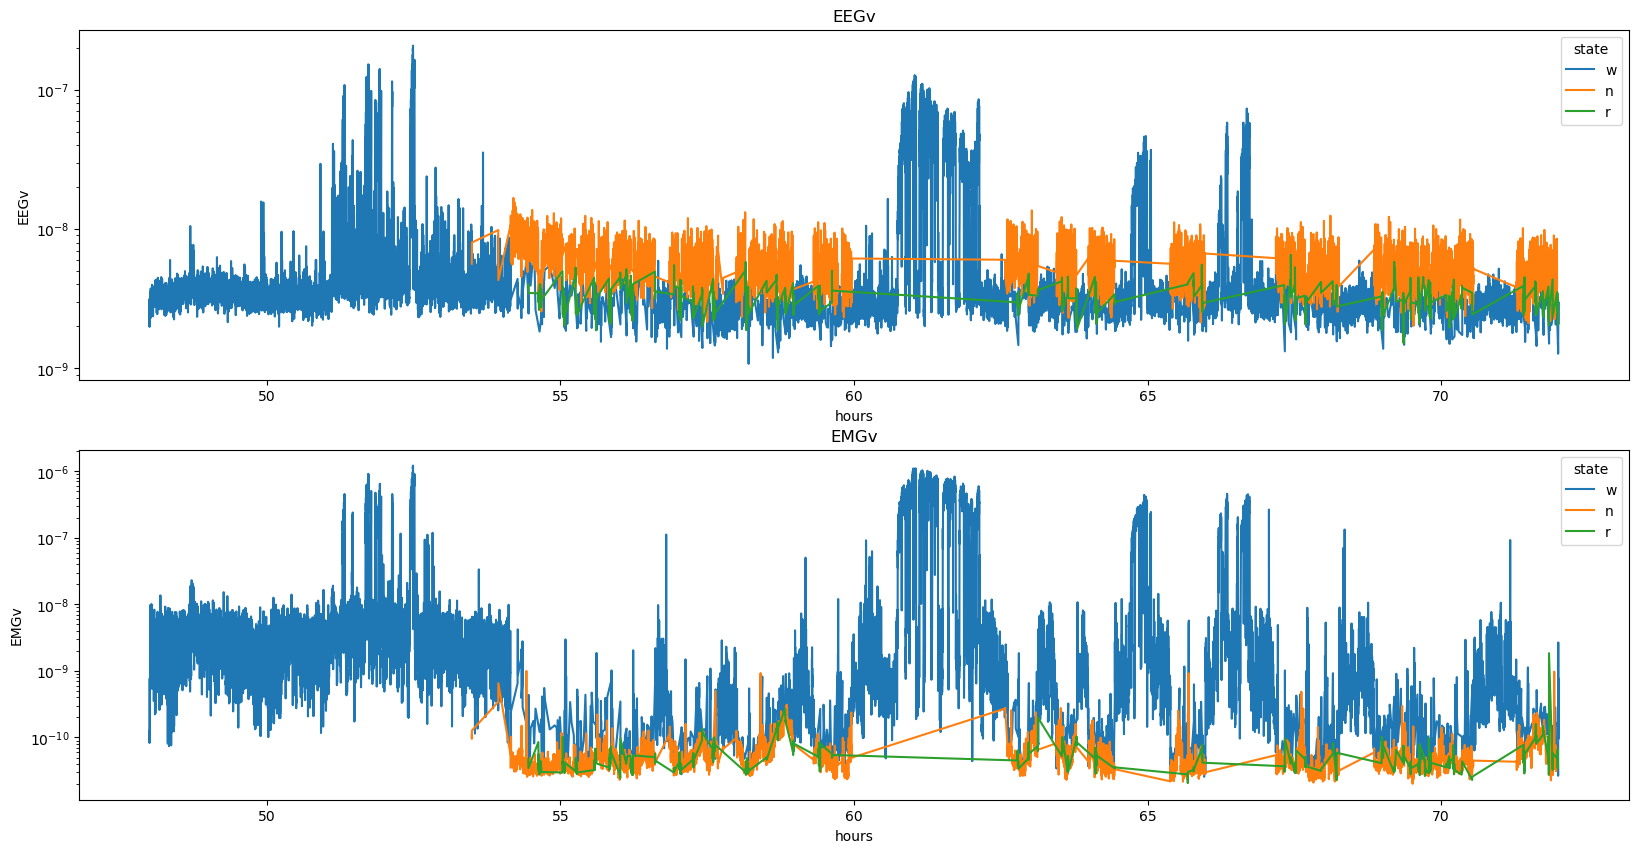

In [20]:
plots.plot_df(data=df, day=2, log=True)

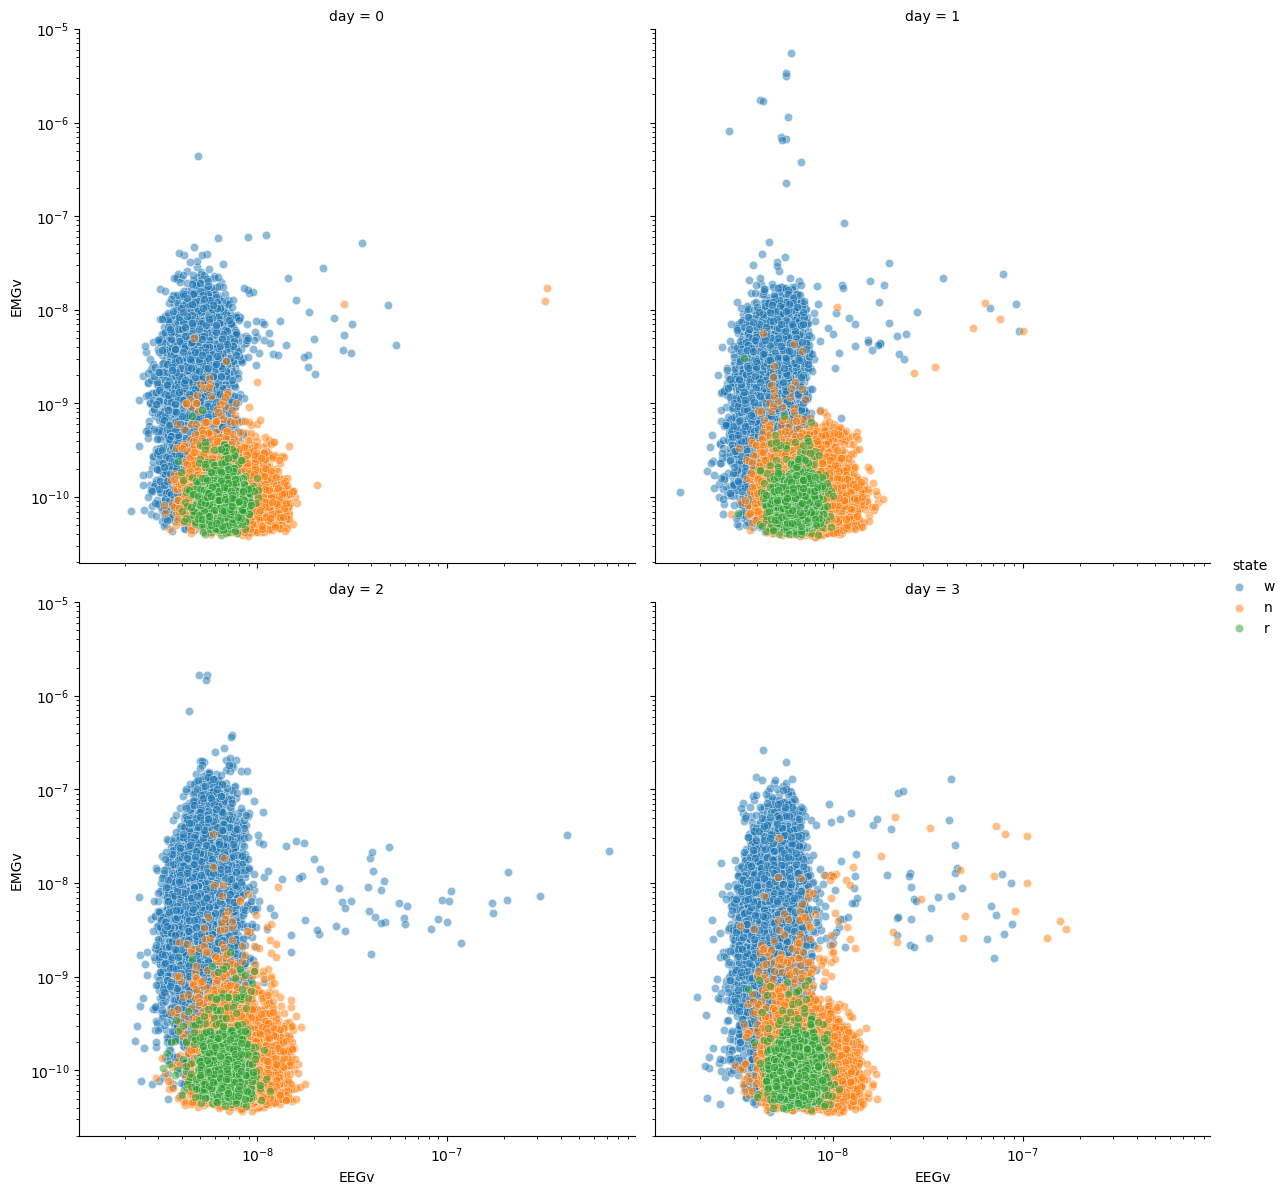

In [15]:
plots.scatter(data=df)

<Figure size 3840x2880 with 0 Axes>

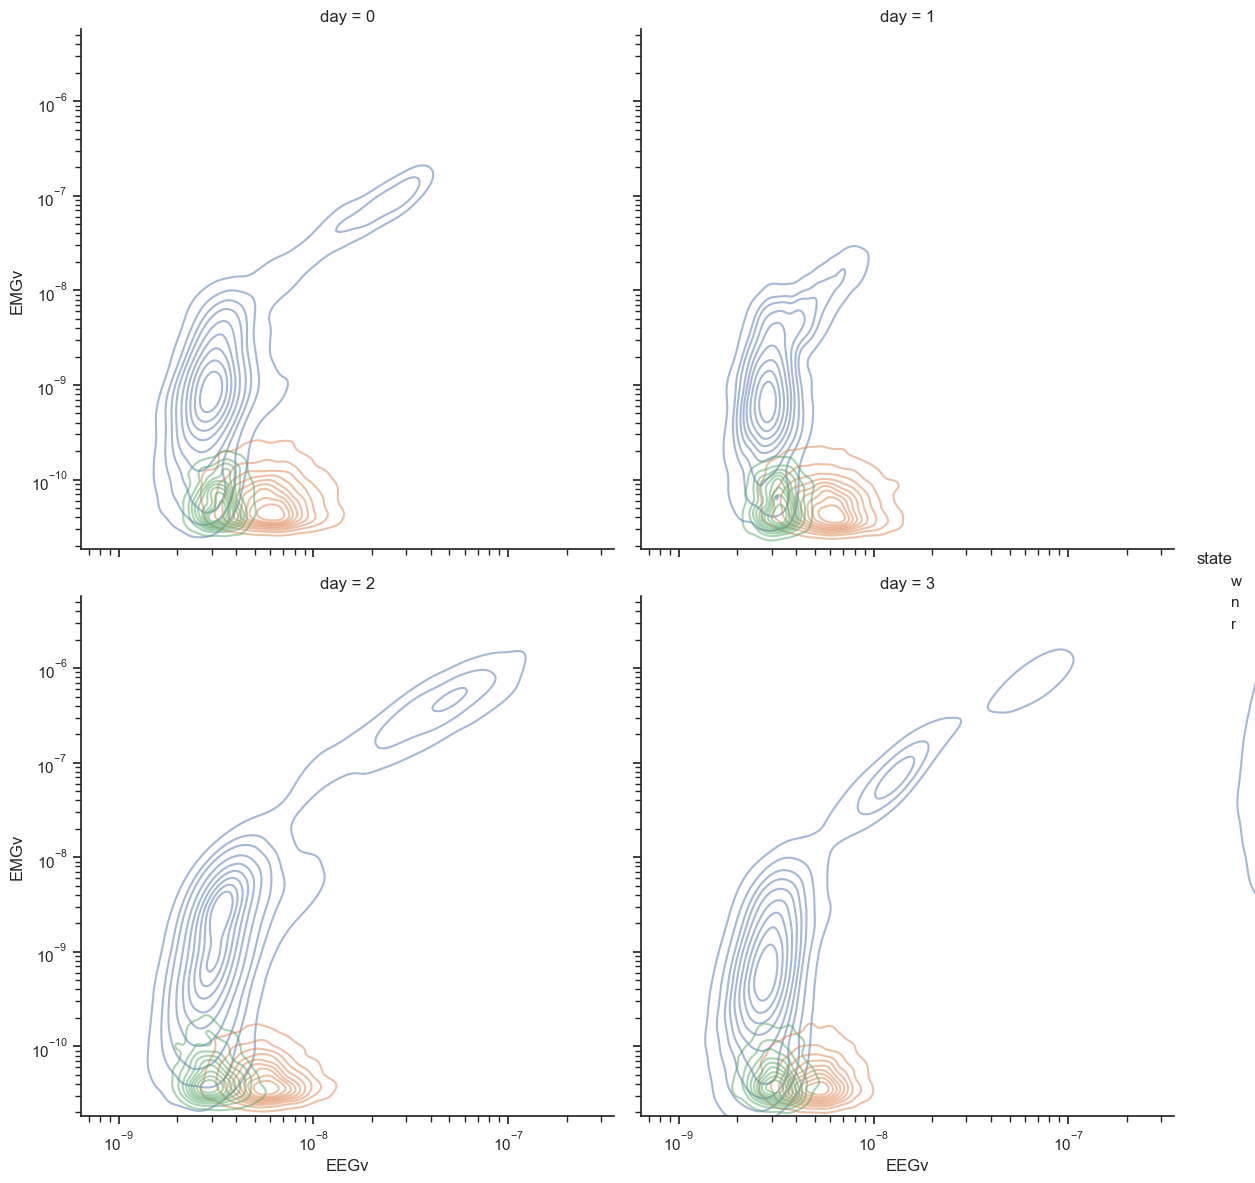

In [12]:
dfs = pd.DataFrame()

for file in ["10101.csv"]:
    data = pd.read_csv(data_folder + file)

    dfs = pd.concat([dfs, data], ignore_index=True)

dfs = features.add_times(dfs)
plots.density(dfs)